### Import Statements

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Set seaborn as the default theme

In [2]:
sns.set_theme()

### Load the data

In [3]:
PATH_TO_DATA = "../data/MachineLearningRating_v3.txt"

In [4]:
data = pd.read_csv(filepath_or_buffer=PATH_TO_DATA, delimiter='|', low_memory=False)

### Data summarization

1) Investigate the data types of the columns

In [5]:
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

2) Basic data descriptive statistics for the numerical columns

In [6]:
descriptive_stats = data.describe()

In [7]:
descriptive_stats

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Data Quality Assessment

Check for missing data in the columns

In [8]:
column_na_rations = data.isna().mean()

In [9]:
# print out columns that have missing values and the amount of missing values as percentages
column_na_rations[column_na_rations > 0].sort_values(ascending=False) * 100

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
WrittenOff                  64.183810
Converted                   64.183810
Rebuilt                     64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
VehicleIntroDate             0.055195
NumberOfDoors                0.055195
bodytype                     0.055195
kilowatts                    0.055195
cubiccapacity                0.055195
Cylinders                    0.055195
Model                        0.055195
CapitalOutstanding           0.000200
dtype: float64

From the columns that have missing values:
- Columns with large amounts of data missing
    - NumberOfVehiclesInFleet with a 100% of its values missing
    - CrossBorder with 99.93% of its values missing
    - CustomValueEstimate with 77.95% of its values missing
    - WrittenOff with 64.18% of its values missing
    - Converted with 64.18% of its values missing
    - Rebuilt with 64.18% of its values missing
- Columns with medium amounts of data missing
    - NewVehicle with 15.32% of its values missing
    - Bank with 14.59% of its values missing
    - AccountType with 4.02% of its values missing
- Columns with insignificant amount of data missing
    - every other column has missing values lower than 0.1%

### Univariate Analysis

1) Find the categorical and numerical columns and put them inside separate columns

In [17]:
numerical_columns = data._get_numeric_data().columns
categorical_columns = [col for col in data.columns if col not in numerical_columns]


# remove the boolean column from the numerical column and add it to the categroical column
bool_columns = ["IsVATRegistered"]
numerical_columns = [col for col in numerical_columns if col not in bool_columns]
categorical_columns = [*bool_columns , *categorical_columns]

In [18]:
print(f"We have {len(categorical_columns)} categorical columns.")
print(f"We have {len(numerical_columns)} numerical columns.")

We have 37 categorical columns.
We have 15 numerical columns.


2) Create histogram plots for the numerical columns

In [19]:
# decide the number of cols in an image
NUM_COLS = 4

# calculate the number of rows
num_rows = math.ceil(len(numerical_columns) / NUM_COLS)

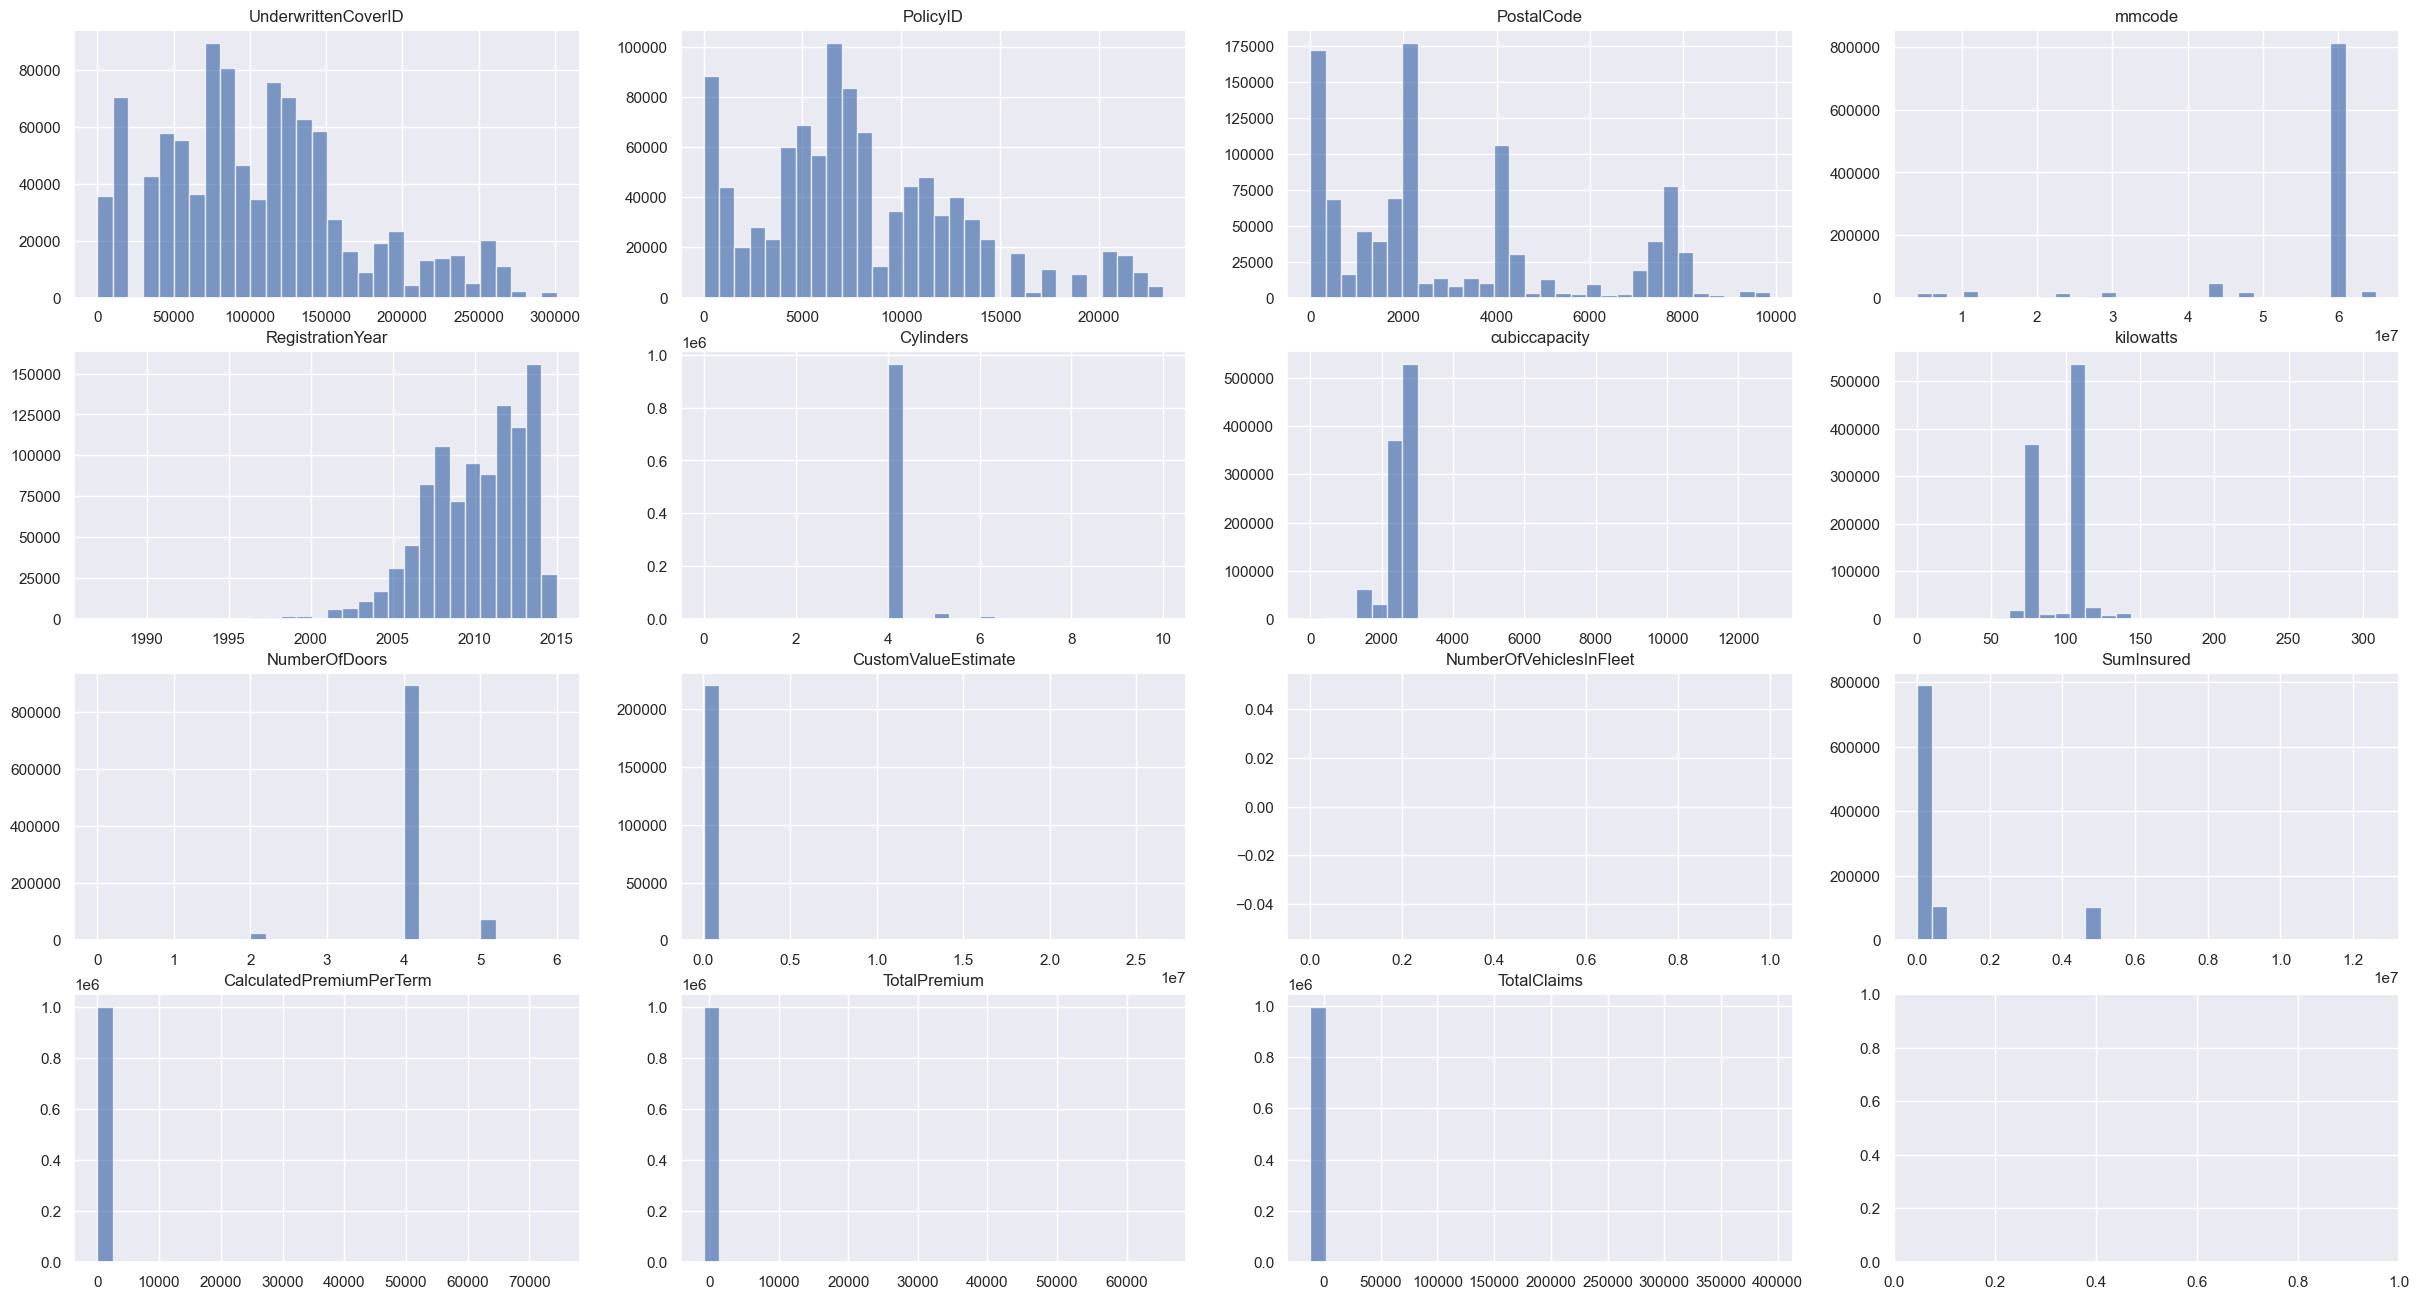

In [21]:
# create subpltos
fig, axes = plt.subplots(ncols=NUM_COLS, nrows=num_rows, figsize=(30, 4 * num_rows))

# flatten the axes
axes = axes.flatten()

for idx, column in enumerate(numerical_columns):
    axes[idx].hist(data[column].dropna(), bins=30, alpha=0.7)
    axes[idx].set_title(column)

plt.show()

3) Create bar plots for the categorical columns

In [14]:
# decide the number of cols in an image
NUM_COLS = 4

# calculate the number of rows
num_rows = math.ceil(len(categorical_columns) / NUM_COLS)